## Import the necessary python packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold,cross_val_score,StratifiedKFold
from scipy import stats
import numpy as np
from sklearn.preprocessing import Imputer 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score



## Loading the necessary csv files into a pandas frame 

In [2]:
df = pd.read_csv('bankruptcy _with_header.csv')

In [3]:
df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [4]:
df.columns=['net profit / total assets',
'total liabilities / total assets',
'working capital / total assets',
'current assets / short-term liabilities',
'[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
'retained earnings / total assets',
'EBIT / total assets',
'book value of equity / total liabilities',
'sales / total assets',
'equity / total assets',
'(gross profit + extraordinary items + financial expenses) / total assets',
'gross profit / short-term liabilities',
'(gross profit + depreciation) / sales',
'(gross profit + interest) / total assets',
'(total liabilities * 365) / (gross profit + depreciation)',
'(gross profit + depreciation) / total liabilities',
'total assets / total liabilities',
'gross profit / total assets',
'gross profit / sales',
'(inventory * 365) / sales',
'sales (n) / sales (n-1)',
'profit on operating activities / total assets',
'net profit / sales',
'gross profit (in 3 years) / total assets',
'(equity - share capital) / total assets',
'(net profit + depreciation) / total liabilities',
'profit on operating activities / financial expenses',
'working capital / fixed assets',
'logarithm of total assets',
'(total liabilities - cash) / sales',
'(gross profit + interest) / sales',
'(current liabilities * 365) / cost of products sold',
'operating expenses / short-term liabilities',
'operating expenses / total liabilities',
'profit on sales / total assets',
'total sales / total assets',
'(current assets - inventories) / long-term liabilities',
'constant capital / total assets',
'profit on sales / sales',
'(current assets - inventory - receivables) / short-term liabilities',
'total liabilities / ((profit on operating activities + depreciation) * (12/365))',
'profit on operating activities / sales',
'rotation receivables + inventory turnover in days',
'(receivables * 365) / sales',
'net profit / inventory',
'(current assets - inventory) / short-term liabilities',
'(inventory * 365) / cost of products sold',
'EBITDA (profit on operating activities - depreciation) / total assets',
'EBITDA (profit on operating activities - depreciation) / sales',
'current assets / total liabilities',
'short-term liabilities / total assets',
'(short-term liabilities * 365) / cost of products sold)',
'equity / fixed assets',
'constant capital / fixed assets',
'working capital',
'(sales - cost of products sold) / sales',
'(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)',
'total costs /total sales',
'long-term liabilities / equity',
'sales / inventory',
'sales / receivables',
'(short-term liabilities *365) / sales',
'sales / short-term liabilities',
'sales / fixed assets',
'class']

## Changing the Label from 'b,0','b,1' to 0,1

In [5]:
df["class"] = df["class"].replace(to_replace ="b'0'",value ="0") 
df["class"] = df["class"].replace(to_replace ="b'1'",value ="1") 


## Preview of the imported data

In [6]:
df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0


## Plotting the corrrelation matrix

In [7]:
corr1 = df.corr()
corr1.style.background_gradient(cmap='coolwarm')

## Calculating the percentage of Null values in each column is decending order

In [8]:
null_values = df.isnull().sum()
percentage_missing_values_df = pd.DataFrame(round(100*(df.isnull().sum()/len(df.index)), 2))
percentage_missing_values_df.sort_values(by = 0, ascending=False)

,0
(current assets - inventories) / long-term liabilities,45.09
sales (n) / sales (n-1),7.68
profit on operating activities / financial expenses,6.81
sales / inventory,5.64
net profit / inventory,5.63
working capital / fixed assets,2.17
equity / fixed assets,2.17
constant capital / fixed assets,2.17
sales / fixed assets,2.17
gross profit (in 3 years) / total assets,2.16


## Droping the coloumn with 45% of null values, as from  the corellation matrix also we can exclude these particular coloumn

In [9]:
df = df.drop('(current assets - inventories) / long-term liabilities', axis=1)

## The rows having more than 60 missing values are removed

In [10]:
# these are the number of rows having > 60 missing values
len(df[df.isnull().sum(axis=1) > 60].index)

# calculated the percentage of missing data from all of the total data
100*(len(df[df.isnull().sum(axis=1) > 60].index) / len(df.index))

# we will retain the rows having <= 60 NaNs
df = df[df.isnull().sum(axis=1) <= 60]

## Data Preview

In [11]:
df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0


## Plotting boxplot for some of the features

[None]

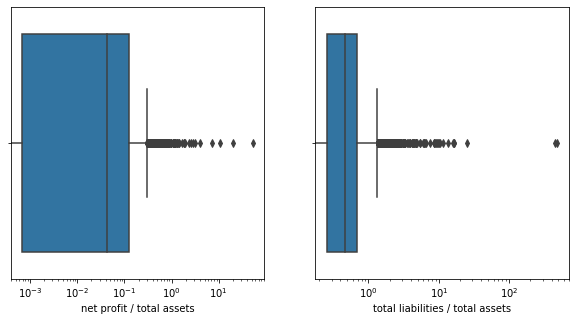

In [12]:
f,axes= plt.subplots(1,2,figsize=(10,5))
ax = sns.boxplot(x=df["net profit / total assets"], ax=axes[0])
ax.set(xscale="log")
ax = sns.boxplot(x=df["total liabilities / total assets"], ax=axes[1])
ax.set(xscale="log")

[None]

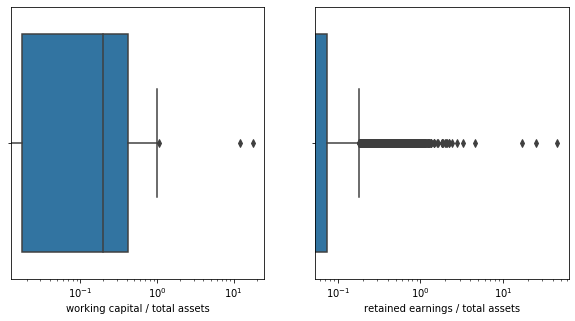

In [13]:
f,axes= plt.subplots(1,2,figsize=(10,5))
ax = sns.boxplot(x=df["working capital / total assets"], ax=axes[0])
ax.set(xscale="log")
ax = sns.boxplot(x=df["retained earnings / total assets"], ax=axes[1])
ax.set(xscale="log")


[None]

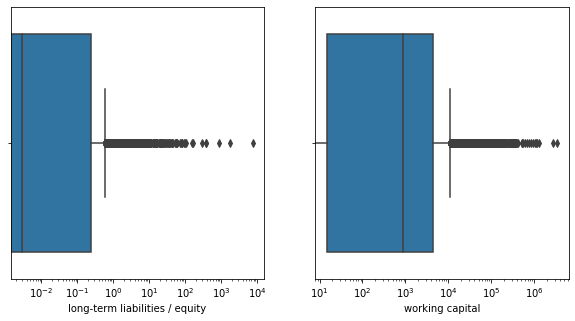

In [14]:
f,axes= plt.subplots(1,2,figsize=(10,5))
ax = sns.boxplot(x=df["long-term liabilities / equity"], ax=axes[0])
ax.set(xscale="log")
ax = sns.boxplot(x=df["working capital"], ax=axes[1])
ax.set(xscale="log")

## From above Data visulatization we can conclude that most of the data conatins outliers , so it is better to remove outliers from the data set

## To remove the outliers in the dataset , we are chosing an upper limit 95% and a lower limit of 5% in each column and displaying the range.

In [15]:
LL= df.loc[:, df.columns != 'class'].quantile(0.05)
UL = df.loc[:, df.columns != 'class'].quantile(0.95)
diff = UL - LL
print(diff)

net profit / total assets                                                                                                  0.553601
total liabilities / total assets                                                                                           0.981320
working capital / total assets                                                                                             1.073980
current assets / short-term liabilities                                                                                    9.651140
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365      712.848000
retained earnings / total assets                                                                                           0.907590
EBIT / total assets                                                                                                        0.585786
book value of equity / total liabilities                                    

## Subsetting the dataset without outliers

In [16]:
df_without_outliers = df[~((df < (LL - 1.5 * diff)) |(df > (UL + 1.5 * diff))).any(axis=1)]
df_without_outliers.shape

(7421, 64)

## Calculating the number of null values is each column


In [17]:
null_values = df.isnull().sum()
percentage_missing_values_df = pd.DataFrame(round(100*(df_without_outliers.isnull().sum()/len(df_without_outliers.index)), 2))
percentage_missing_values_df.sort_values(by = 0, ascending=False)


,0
sales (n) / sales (n-1),6.64
profit on operating activities / financial expenses,5.67
net profit / inventory,3.40
sales / inventory,3.40
gross profit (in 3 years) / total assets,2.09
total liabilities / ((profit on operating activities + depreciation) * (12/365)),1.91
equity / fixed assets,1.25
working capital / fixed assets,1.25
sales / fixed assets,1.25
constant capital / fixed assets,1.25


## Splitting data into Label(y) and features(X) 

In [18]:

final_df = df_without_outliers #renaming the dataset
X = final_df.drop('class',axis=1).values
y = final_df['class'].values

print(X.shape)
print(y.shape)

(7421, 63)
(7421,)


## Imputing the dataset with the median of the columns, because the values are skewed.

In [19]:
fill_NaN = Imputer(missing_values=np.nan, strategy='median', axis=0)
imputed_final_df = pd.DataFrame(fill_NaN.fit_transform(X))
X = imputed_final_df

/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Splitting data into Training and Testing data test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5936, 63)
(5936,)
(1485, 63)
(1485,)


## Plotting the class imbalance in training & test

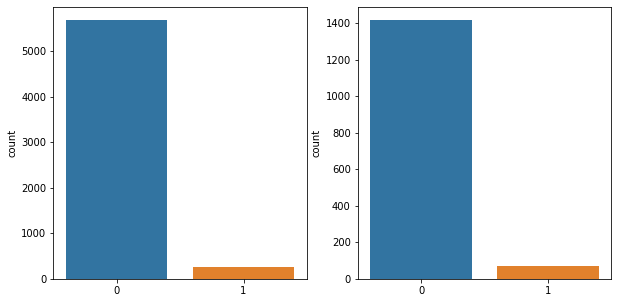

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.subplot(1,2,2)
sns.countplot(y_test)

## Applying Logistic Regression with Holdout validation

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_test_pred = logreg.predict(X_test)
f1_score(y_test,y_test_pred,average='micro')

/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9555555555555556

## Applying Logistic Regression using KFold Cross Validation

In [23]:
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
accuracies = cross_val_score(logreg,X,y,cv=folds)
print(accuracies)
print(np.mean(accuracies))

/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

[0.95824916 0.95622896 0.95350404 0.95619946 0.95616993]
0.9560703088694538


## Hyper Parameter tuning of "C" for Lasso regularisaiton with Logistic regression 

In [24]:
grid={"C":np.logspace(-1,3,10), "penalty":["l1"]}
logreg=LogisticRegression()
logreg_lasso=GridSearchCV(logreg,grid,cv=folds)
logreg_lasso.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_lasso.best_params_)
print("accuracy :",logreg_lasso.best_score_)
y_test_pred_logreg_lasso = logreg_lasso.predict(X_test)
f1_score(y_test,y_test_pred_logreg_lasso,average='micro')

/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

tuned hpyerparameters :(best parameters)  {'C': 5.994842503189409, 'penalty': 'l1'}
accuracy : 0.9595687331536388


0.9595959595959596

## Hyper Parameter tuning of "C" for Ridge regularisaiton with Logistic regression 

In [25]:
grid={"C":np.logspace(-1,3,10), "penalty":["l2"]}
logreg=LogisticRegression()
logreg_ridge=GridSearchCV(logreg,grid,cv=folds)
logreg_ridge.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",logreg_ridge.best_params_)
print("accuracy :",logreg_ridge.best_score_)
y_test_pred_logreg_ridge = logreg_ridge.predict(X_test)
log_ridge_acc=f1_score(y_test,y_test_pred_logreg_ridge,average='micro')
log_ridge_acc

/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

tuned hyperparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9565363881401617


0.9569023569023569

## Lasso Regularization of "C" with Random Forest Classifier

In [26]:
from sklearn.metrics import roc_auc_score
def RandomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=1, max_depth=4)
    rf.fit(X_train, y_train)
    pred = rf.predict_proba(X_train)
    pred = rf.predict_proba(X_test)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    return(roc_auc_score(y_test, pred[:,1]))

# Appling Lasso regularization with Random forest classifier

## Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, features can be removed from the model, thus increasing the interpretability of the model

In [27]:
from sklearn.feature_selection import SelectFromModel
scaler=StandardScaler()
scaler.fit(X_train)
lasso_reg=SelectFromModel(LogisticRegression(C=6,penalty='l1')) #to drop the columns
lasso_reg.fit(scaler.transform(X_train),y_train)

/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=6, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

### Printing the number of features selected and numbers of features cloumn deleted by lasso regularization (C=6, lower is the value of C stronger will be the regularization)

In [28]:
print('Number of Features in total = ',X_train.shape[1])
print('Number of Features selected = ',sum(lasso_reg.get_support()))
print('Number of Features deleted = ',np.sum(lasso_reg.estimator_.coef_==0))

Number of Features in total =  63
Number of Features selected =  61
Number of Features deleted =  2


### Running Random forest classifier on new set of slected features

In [29]:
X_train_lasso=lasso_reg.transform(X_train)
X_test_lasso=lasso_reg.transform(X_test)
random_lasso_acc=RandomForest(X_train_lasso,X_test_lasso,y_train,y_test)
print(random_lasso_acc)

0.8631481173979825


## Ridge Regularization + Random Forest Classifier

In [30]:
ridge_reg=SelectFromModel(LogisticRegression(C=1000,penalty='l2'))
ridge_reg.fit(scaler.transform(X_train),y_train)

/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1000, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

### Printing the number of features selected and numbers of features column deleted by Ridge regularization

In [31]:
print('Number of Features in total = ',X_train.shape[1])
print('Number of Features selected = ',sum(ridge_reg.get_support()))
print('Number of Features deleted = ',np.sum(ridge_reg.estimator_.coef_==0))

Number of Features in total =  63
Number of Features selected =  13
Number of Features deleted =  0


#### L2 or Ridge regression will not shrink the coefficient to zero but here we are able to see 86 features have zero coefficient. L2 have not srink the coefficient of the features to zero. Actually, these are constant features which means these features have same value for all samples.

### Running Random forest classifier on new set of slected features

In [32]:
X_train_ridge=ridge_reg.transform(X_train)
X_test_ridge=ridge_reg.transform(X_test)
rand_ridge_acc=RandomForest(X_train_ridge,X_test_ridge,y_train,y_test)
rand_ridge_acc

0.8185997758312923

### Creating a pipeline for SVC and using cross validation

In [33]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), 
    ('clf', SVC())
])
clfs = []
clfs.append(SVC())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


---------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  0.3573157787322998
fit_time  std  0.006936177074463489
score_time  mean  0.12578399976094565
score_time  std  0.0023584539406429116
test_score  mean  0.9577156877922602
test_score  std  0.0002282080058252898


# SVC model parameters

In [34]:
pipeline.set_params(clf= SVC())
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False))]

We believe the score of the SVC model can be improved with Hyperparameter tuning

In [35]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__kernel' : ['linear', 'rbf','sigmoid'],
    'clf__C' : np.linspace(0.1,2.0,15)
})

cv_grid.fit(X_train, y_train)

/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('normalizer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shr...
                                            tol=0.001, verbose=False))],
                

## The parameters of the tuned models

In [36]:
cv_grid.best_params_


{'clf__C': 1.05, 'clf__kernel': 'linear'}

Estimator information

cv_grid.best_estimator_


# By comparing all the above models we found

In [37]:
print(f"Logistics regression with Lasso + hyperparameter tuning {f1_score(y_test,y_test_pred_logreg_lasso,average='micro')}")
print(f"Logistics regression with Ridge + hyperparameter tuning {log_ridge_acc}")
print(f"SVC with hyperparameter tuning {cv_grid.best_score_} ")
print(f"Random forest with new selected columns based on lasso regularisation {random_lasso_acc}")
print(f"Random forest with new selected columns based on lasso regularisation {rand_ridge_acc}")


Logistics regression with Lasso + hyperparameter tuning 0.9595959595959596
Logistics regression with Ridge + hyperparameter tuning 0.9569023569023569
SVC with hyperparameter tuning 0.95838948787062 
Random forest with new selected columns based on lasso regularisation 0.8631481173979825
Random forest with new selected columns based on lasso regularisation 0.8185997758312923


# As Logistic Regression with Lasso is the winning model. 

# Finally we are fiting the model with the entire dataset for production purpose.

In [ ]:
final_model = logreg_lasso.fit(X,y)

/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.